<a href="https://colab.research.google.com/github/Lungelo-cloud/Hub-Analytics/blob/main/Hub_Analytica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook for analyzing Innovators Association of Eswatini membership sign-in data.

1. Import packages, install gspread for importing google spreadsheets.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
!pip install --upgrade gspread

  Attempting uninstall: gspread
    Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
#sheet_id = '1pzSSXuXJXWCGDAQG-y8JEj4GziIpywAZye0FWCNkCI4'
#df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
#df.head()

2. Importing the google spreadsheet

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('1WGVWOsjKdp4eP_6PcqdnU7r6r8RW0hAtUVakTlrFWxw')

ws = wb.worksheet('Form Responses 1')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
#print(rows)

# Convert to a DataFrame and render.
#import pandas as pd
#pd.DataFrame.from_records(rows)

3. Importing the spreadsheet into a pandas dataframe.

In [3]:
df = pd.DataFrame.from_records(rows[1:], columns=rows[0])
df.head()

,Timestamp,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
0,2/11/2021,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,6:00:00 AM,,,,,
1,2/11/2021,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,
2,2/11/2021,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,,,,,,
3,2/13/2021,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,,,,,,
4,2/13/2021,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,


4. Replacing missing values with "Nan"

In [4]:
df.replace("", np.nan, inplace = True)
df.head()

,Timestamp,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
0,2/11/2021,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,6:00:00 AM,NaN,NaN,NaN,NaN,NaN
1,2/11/2021,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN
2,2/11/2021,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,NaN,NaN,NaN,NaN,NaN,NaN
3,2/13/2021,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,NaN,NaN,NaN,NaN,NaN,NaN
4,2/13/2021,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN


5. Checking for missing data.

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

Timestamp
False    850
Name: Timestamp, dtype: int64

First Name
False    850
Name: First Name, dtype: int64

Phone Number
True     430
False    420
Name: Phone Number, dtype: int64

Sign-in Time
False    850
Name: Sign-in Time, dtype: int64

What are you working on today?
False    850
Name: What are you working on today?, dtype: int64

What equipment will you use?
False    850
Name: What equipment will you use?, dtype: int64

Internet?
False    849
True       1
Name: Internet?, dtype: int64

How many hours will you be putting in?
False    829
True      21
Name: How many hours will you be putting in?, dtype: int64

Are you a member of The Hub?
False    747
True     103
Name: Are you a member of The Hub?, dtype: int64

Are you a student (from any institution)?
True     430
False    420
Name: Are you a student (from any institution)?, dtype: int64

What company do you work for?
False    430
True     420
Name: What company do you work for?, dtype: int64

Last Name
False    430
True     42

6. Checking the modal "sign_out_time (Before it changed to how many hours will you spend?)" and modal "internet", the decision is to replace missing values in those columns by those modes. 

In [6]:
mode_sign_out_time = df['How many hours will you be putting in?'].mode(dropna = True)
mode_internet = df['Internet?'].mode(dropna = True)
print('mode sign out time: \n',mode_sign_out_time)
print('')
print('mode internet: \n',mode_internet)

mode sign out time: 
 0    5:00:00 PM
dtype: object

mode internet: 
 0    Shared Hotspot
dtype: object


In [7]:
df['How many hours will you be putting in?'] = df['How many hours will you be putting in?'].replace(np.nan, '5:00:00 PM')
df['Internet?'] = df['Internet?'].replace(np.nan, 'Shared Hotspot')

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df = df.set_index('Timestamp')

In [10]:
df["What company do you work for?"].unique()

array([nan, 'Ummo', 'Kingdom XLR', 'Freelancer', 'Snowsen', 'Vundzisa',
       'Guwava', 'SV Tech', 'Rare Jam', 'Rare Jamz'], dtype=object)

In [17]:
df["First Name"].unique()

array(['Kwanele', 'José', 'Simanga', 'Sikhulile', 'Mzwandile',
       'Gcinimiyalo', 'Lungelo', 'Zack', 'Sabelo', 'Sibusiso', 'Mlungisi',
       'Percy', 'Mano', 'Bagcinele', 'Thobeka', 'Fanelesibonge',
       'Ncobile', 'Nosifiso', 'Lihle', 'Nomalungelo', 'Sebenzile',
       'Nombuso', 'Lwazi', 'Sibahle', 'Ayanda', 'Siphumelele', 'Muzi',
       'Alex', 'Thandwa', 'Bafana', 'Jonathan', 'Fezile', 'Tiyandza',
       'Lindinkosi', 'Maphila', 'Mnqobi', 'Zolile', 'Mhlengi',
       'Thelumusa', 'Sihle', 'Kangiso', 'Majaha', 'Gcina', 'Thokozani'],
      dtype=object)

In [16]:
df['Last Name'] = df['Last Name'].str.strip()
df['First Name'] = df['First Name'].str.strip()
df['First Name'] = df['First Name'].replace('Kwanele Prince', 'Kwanele')
df['First Name'] = df['First Name'].replace('Tsabedze', 'Kwanele') 
df['First Name'] = df['First Name'].replace('Muzi Chaboy', 'Muzi')
df['First Name'] = df['First Name'].replace('Tyga', 'Sikhulile')
df['First Name'] = df['First Name'].replace('Siphumelele Poestess', 'Siphumelele')
df['First Name'] = df['First Name'].replace('Snowsen Innovations', 'Bafana')
df['First Name'] = df['First Name'].replace('Sabelo S', 'Sabelo')

In [41]:
df.loc[df['First Name'] == 'Kwanele', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Vundzisa', 'Yes', 'Yes', 'Tsabedze'
df.loc[df['First Name'] == 'Simanga', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Ntsini'
df.loc[df['First Name'] == 'Sikhulile', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Kingdom XLR', 'No', 'Yes', 'Zwane'
df.loc[df['First Name'] == 'Mzwandile', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Kingdom XLR', 'No', 'Yes', 'Nxumalo'
df.loc[df['First Name'] == 'Gcinimiyalo', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Ntuli'
df.loc[df['First Name'] == 'Lungelo', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Mamba'
df.loc[df['First Name'] == 'Zack', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Towindo'
df.loc[df['First Name'] == 'Sabelo', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'SV Tech', 'Yes', 'Yes', 'Vilakati'
df.loc[df['First Name'] == 'Sibusiso', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Tsabedze'
df.loc[df['First Name'] == 'Percy', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'SV Tech', 'No', 'Yes', 'Malambe'
df.loc[df['First Name'] == 'Mano', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Mafomisa'
df.loc[df['First Name'] == 'Bagcinele', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Kingdom XLR', 'No', 'Yes', 'Fakudze'
df.loc[df['First Name'] == 'Thobeka', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Nxumalo'
df.loc[df['First Name'] == 'Fanelesibonge', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Malaza'
df.loc[df['First Name'] == 'Bafana', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Snowsen', 'No', 'Yes', 'Gama'
df.loc[df['First Name'] == 'Tiyandza', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Snowsen', 'No', 'Yes', 'Cindzi'
df.loc[df['First Name'] == 'Sibahle', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Ummo', 'Yes', 'Yes', 'Mnyakeni'
df.loc[df['First Name'] == 'Lindinkosi', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'No', 'Mdluli'
df.loc[df['First Name'] == 'Lihle', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Dlamini'
df.loc[df['First Name'] == 'Muzi', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Rare Jam', 'Yes', 'Yes', 'Mathunjwa'
df.loc[df['First Name'] == 'Mlungisi', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'No', 'Shongwe'
df.loc[df['First Name'] == 'Nomalungelo', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Kingdom XLR', 'No', 'Yes', 'Dladla'
df.loc[df['First Name'] == 'Nombuso', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'SV Tech', 'Yes', 'Yes', 'Hlophe'
df.loc[df['First Name'] == 'Lwazi', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'SV Tech', 'Yes', 'Yes', 'Dlamini'
df.loc[df['First Name'] == 'Siphumelele', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Malambe'
df.loc[df['First Name'] == 'Ayanda', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'No', 'Yes', 'Tsela'
df.loc[df['First Name'] == 'Siphumelele', ['What company do you work for?', 'Are you a student (from any institution)?', 'Are you a member of The Hub?', 'Last Name']] = 'Freelancer', 'Yes', 'Yes', 'Malambe'

In [49]:
df.loc[df['First Name'] == 'Ncobile', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'Yes', 'Freelancer', 'TBA'
df.loc[df['First Name'] == 'Alex', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'No', 'Kingdom XLR', 'Muti'
df.loc[df['First Name'] == 'Fezile', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'Yes', 'Freelancer', 'Mhlabane'
df.loc[df['First Name'] == 'Jonathan', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'Yes', 'Kingdom XLR', 'Mulumba Obiege'
df.loc[df['First Name'] == 'Nosifiso', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'Yes', 'Freelancer', 'Mamba'
df.loc[df['First Name'] == 'Thandwa', ['Are you a student (from any institution)?', 'What company do you work for?', 'Last Name']] = 'Yes', 'Freelancer', 'Mamba'

In [50]:
df.loc[df['First Name'] == 'Thandwa']

,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
Timestamp,,,,,,,,,,,,
2021-07-30,Thandwa,76535415,11:17:00 AM,Research,PC Workstation,Shared Hotspot,5:00:00 PM,No,Yes,Freelancer,Mamba,NaN


In [48]:
first_name_last_name = df[['First Name', 'Last Name']]
first_name_last_name = first_name_last_name.groupby('First Name')['Last Name'].unique()
#first_name_last_name = first_name_last_name.agg({"Last Name": "nunique"})
first_name_last_name = first_name_last_name.reset_index()
first_name_last_name

,First Name,Last Name
0,Alex,[Muti]
1,Ayanda,[Tsela]
2,Bafana,[Gama]
3,Bagcinele,[Fakudze]
4,Fanelesibonge,[Malaza]
5,Fezile,[Mhlabane]
6,Gcina,[Cindzi]
7,Gcinimiyalo,[Ntuli]
8,Jonathan,[Mulumba Obiege]
9,José,[Rego]


In [51]:
df.head()

,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
Timestamp,,,,,,,,,,,,
2021-02-11,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,6:00:00 AM,Yes,Yes,Vundzisa,Tsabedze,NaN
2021-02-11,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN
2021-02-11,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,5:00:00 PM,Yes,No,Freelancer,Ntsini,NaN
2021-02-13,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,5:00:00 PM,Yes,No,Freelancer,Ntsini,NaN
2021-02-13,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN


In [52]:
df.replace(np.nan, "", inplace = True)

df1 is a dataframe where entries of the column 'how many hours will you be putting in?' were time in the 24 hr clock.

In [53]:
df1 = df.loc['2021-02-11 00:00:00':'2021-08-22 16:28:53']

In [54]:
df1.tail()

,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
Timestamp,,,,,,,,,,,,
2021-08-21 23:54:00,Mhlengi,,8:00:00 PM,Content & Creativity,"Brought my own workstation, Audio Box",Brought my own internet,12:00:00 AM,Yes,Yes,Freelancer,Nkambule,
2021-08-22 09:09:09,Kwanele,,1:10:00 PM,"Company Work, Research, Content & Creativity",Mac Workstation,Shared Hotspot,7:45:00 PM,Yes,Yes,Vundzisa,Tsabedze,
2021-08-22 09:10:04,Bafana,,9:00:00 AM,"Company Work, Content & Creativity","PC Workstation, Keyboard, Mouse, Monitor",Shared Hotspot,3:00:00 PM,Yes,No,Snowsen,Gama,
2021-08-22 13:52:25,Simanga,,10:30:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,8:30:00 PM,Yes,No,Freelancer,Ntsini,
2021-08-22 16:28:53,Muzi,,4:15:00 PM,Content & Creativity,"Brought my own workstation, Audio Box",Shared Hotspot,6:00:00 PM,Yes,Yes,Rare Jam,Mathunjwa,


In [55]:
df1['How many hours will you be putting in?'] = pd.to_datetime(df1['How many hours will you be putting in?'])
df1['Sign-in Time'] = pd.to_datetime(df1['Sign-in Time'])

In [56]:
df1['How many hours will you be putting in?'] = (df1['How many hours will you be putting in?']-df1['Sign-in Time'])/np.timedelta64(1,'h')
df1['How many hours will you be putting in?'] = abs(df1['How many hours will you be putting in?'])
df1['How many hours will you be putting in?'] = df1['How many hours will you be putting in?'].replace(0.0, 8.0)

In [57]:
df['How many hours will you be putting in?'].loc['2021-02-11 00:00:00':'2021-08-22 16:28:53'] = df1['How many hours will you be putting in?']

In [58]:
df = df.reset_index()
df.head()

,Timestamp,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
0,2021-02-11,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,5,Yes,Yes,Vundzisa,Tsabedze,
1,2021-02-11,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,12,Yes,No,Ummo,Rego,
2,2021-02-11,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,13,Yes,No,Freelancer,Ntsini,
3,2021-02-13,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,6,Yes,No,Freelancer,Ntsini,
4,2021-02-13,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,12,Yes,No,Ummo,Rego,


In [59]:
df['Timestamp'] = df['Timestamp'].astype('str')
df['Sign-in Time'] = df['Sign-in Time'].astype('str')

In [60]:
df['Internet?'].unique()

array(['Shared Hotspot', 'BYOI', 'Brought my own internet',
       "Don't need internet"], dtype=object)

In [ ]:
df.dtypes

Timestamp                                    object
First Name                                   object
Phone Number                                 object
Sign-in Time                                 object
What are you working on today?               object
What equipment will you use?                 object
Internet?                                    object
How many hours will you be putting in?       object
Are you a member of The Hub?                 object
Are you a student (from any institution)?    object
What company do you work for?                object
Last Name                                    object
What equipment will you check out?           object
dtype: object

In [61]:
df.replace(np.nan, "", inplace = True)
df['Internet?'].replace('BYOI', 'Brought my own internet', inplace=True)
df.replace('Brought my own internet', '', inplace=True)
df['Internet?'].replace('', 'Brought my own internet', inplace=True)

In [62]:
lOfList = df.to_numpy().tolist()
print(lOfList)

[['2021-02-11 00:00:00', 'Kwanele', '7815 8606', '11:00:00 AM', 'Company Work', 'Brought my own workstation', 'Shared Hotspot', 5.0, 'Yes', 'Yes', 'Vundzisa', 'Tsabedze', ''], ['2021-02-11 00:00:00', 'José', '', '8:00:00 AM', 'Company Work', 'Mac Workstation', 'Shared Hotspot', 12.0, 'Yes', 'No', 'Ummo', 'Rego', ''], ['2021-02-11 00:00:00', 'Simanga', '78501932', '4:00:00 AM', 'Content & Creativity', 'PC Workstation', 'Shared Hotspot', 13.0, 'Yes', 'No', 'Freelancer', 'Ntsini', ''], ['2021-02-13 00:00:00', 'Simanga', '78501932', '11:00:00 AM', 'Content & Creativity', 'Mac Workstation', 'Shared Hotspot', 6.0, 'Yes', 'No', 'Freelancer', 'Ntsini', ''], ['2021-02-13 00:00:00', 'José', '', '8:00:00 AM', 'Company Work', 'Mac Workstation', 'Shared Hotspot', 12.0, 'Yes', 'No', 'Ummo', 'Rego', ''], ['2021-02-13 00:00:00', 'Sikhulile', '+26879384734', '11:45:00 AM', 'Content & Creativity', 'Brought my own workstation', 'Shared Hotspot', 7.25, 'Yes', 'No', 'Kingdom XLR', 'Zwane', ''], ['2021-02-1

In [63]:
headers = df.columns.to_list()

In [64]:
dataTowrite = [headers] + lOfList

In [65]:
print(dataTowrite)

[['Timestamp', 'First Name', 'Phone Number', 'Sign-in Time', 'What are you working on today?', 'What equipment will you use?', 'Internet?', 'How many hours will you be putting in?', 'Are you a member of The Hub?', 'Are you a student (from any institution)?', 'What company do you work for?', 'Last Name', 'What equipment will you check out?'], ['2021-02-11 00:00:00', 'Kwanele', '7815 8606', '11:00:00 AM', 'Company Work', 'Brought my own workstation', 'Shared Hotspot', 5.0, 'Yes', 'Yes', 'Vundzisa', 'Tsabedze', ''], ['2021-02-11 00:00:00', 'José', '', '8:00:00 AM', 'Company Work', 'Mac Workstation', 'Shared Hotspot', 12.0, 'Yes', 'No', 'Ummo', 'Rego', ''], ['2021-02-11 00:00:00', 'Simanga', '78501932', '4:00:00 AM', 'Content & Creativity', 'PC Workstation', 'Shared Hotspot', 13.0, 'Yes', 'No', 'Freelancer', 'Ntsini', ''], ['2021-02-13 00:00:00', 'Simanga', '78501932', '11:00:00 AM', 'Content & Creativity', 'Mac Workstation', 'Shared Hotspot', 6.0, 'Yes', 'No', 'Freelancer', 'Ntsini', ''],

In [66]:
ws2 = wb.worksheet('Analysis')

In [67]:
ws2.update(None, dataTowrite)

{'spreadsheetId': '1WGVWOsjKdp4eP_6PcqdnU7r6r8RW0hAtUVakTlrFWxw',
 'updatedCells': 11063,
 'updatedColumns': 13,
 'updatedRange': 'Analysis!A1:M851',
 'updatedRows': 851}

In [68]:
df = df.reset_index()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')
df.head()

,index,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
Timestamp,,,,,,,,,,,,,
2021-02-11,0,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,5,Yes,Yes,Vundzisa,Tsabedze,
2021-02-11,1,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,12,Yes,No,Ummo,Rego,
2021-02-11,2,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,13,Yes,No,Freelancer,Ntsini,
2021-02-13,3,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,6,Yes,No,Freelancer,Ntsini,
2021-02-13,4,José,,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,12,Yes,No,Ummo,Rego,


In [ ]:
df11 = df.loc['2021-09-06 00:00:00':'2021-09-12 23:59:59']
df11.head()

,index,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
Timestamp,,,,,,,,,,,,,
2021-09-06 15:51:44,797,José,,8:00:00 AM,"Company Work, Coding",Mac Workstation,Shared Hotspot,12,Yes,No,Ummo,Rego,
2021-09-07 11:00:25,798,Sikhulile,,10:30:00 AM,"Company Work, Research","Mac Workstation, PC Tower, Keyboard, Mouse, Mo...",Shared Hotspot,24,Yes,No,Kingdom XLR,Zwane,
2021-09-07 11:02:31,799,Simanga,,9:00:00 AM,"Research, Content & Creativity",Mac Workstation,Shared Hotspot,5,Yes,No,Freelancer,Ntsini,
2021-09-07 11:47:58,800,Alex,,11:30:00 AM,Company Work,"Mac Workstation, PC Tower, Keyboard, Mouse, Mo...",Shared Hotspot,5,Yes,No,Kingdom XLR,Muti,
2021-09-07 12:14:59,801,Muzi,,11:00:00 AM,"Academic Work, Research",Brought my own workstation,Shared Hotspot,2,Yes,Yes,Rare Jamz,Mathunjwa,


In [ ]:
#df11['Sign-in Time'] = pd.to_datetime(df11['Sign-in Time'])

In [ ]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#df['Sign-in Time'] = pd.to_datetime(df['Sign-in Time'])
#df['What time do you expect to be out of The Hub?'] = pd.to_datetime(df['What time do you expect to be out of The Hub?'])
df11['How many hours will you be putting in?'] = pd.to_numeric(df11['How many hours will you be putting in?'])
df11.dtypes

index                                          int64
First Name                                    object
Phone Number                                  object
Sign-in Time                                  object
What are you working on today?                object
What equipment will you use?                  object
Internet?                                     object
How many hours will you be putting in?       float64
Are you a member of The Hub?                  object
Are you a student (from any institution)?     object
What company do you work for?                 object
Last Name                                     object
What equipment will you check out?            object
dtype: object

In [ ]:
#df11 = df11.set_index('Timestamp')

In [ ]:
cato=df11['What are you working on today?'].str.split(',')
cat_set=[]
for i in cato.dropna():
    cat_set.extend(i)
plt1 = pd.Series(cat_set)
plt1 = plt1.str.strip()
plt2=plt1.value_counts().sort_values(ascending=False).to_frame()
plt2.columns = ['Count']

In [ ]:
plt2.T

,Company Work,Coding,Research,Content & Creativity,Academic Work
Count,17,14,11,7,2


In [ ]:
len(df1)

54

In [ ]:
df2 = df11['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df2 = df2.apply(splitting_columns)
df2[0] = df2[0].str.strip()
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()
df3 = df2[0].append(df2[1], ignore_index=True)
df4 = df3.append(df2[2], ignore_index=True)
df4 = df4.dropna()
df5 = df4.value_counts(dropna=True).to_frame()
df5.columns = ['count']
df5

,count
Company Work,16
Coding,14
Research,11
Content & Creativity,7
Academic Work,2


In [ ]:
df6 = df11['What company do you work for?']
df7 = df6.value_counts().to_frame()
df7.columns = ['Number of hub visits']

In [ ]:
df7

,Number of hub visits
Freelancer,10
Ummo,6
Snowsen,5
SV Tech,3
Kingdom XLR,2
Rare Jamz,2
Rare Jam,1


In [ ]:
df8 = df11['What equipment will you use?']
df8 = df8.apply(splitting_columns)
df8[0] = df8[0].str.strip()
df8[1] = df8[1].str.strip()
df8[2] = df8[2].str.strip()
df8[3] = df8[3].str.strip()
df9 = df8[0].append(df8[1], ignore_index=True)
df10 = df9.append(df8[2], ignore_index=True)
df400 = df10.append(df8[3], ignore_index=True)
equipment_used = df400.value_counts(dropna=True).to_frame()
equipment_used.columns = ['count']
equipment_used

,count
Mouse,10
Brought my own workstation,10
Mac Workstation,10
Keyboard,8
PC Tower,8
Monitor,7
Audio Box,1


In [ ]:
df11.columns

Index(['First Name', 'Phone Number', 'Sign-in Time',
       'What are you working on today?', 'What equipment will you use?',
       'Internet?', 'How many hours will you be putting in?',
       'Are you a member of The Hub?',
       'Are you a student (from any institution)?',
       'What company do you work for?', 'Last Name',
       'What equipment will you check out?'],
      dtype='object')

In [ ]:
d12 = df11['First Name']
#d12 = d12.replace('Kwanele Prince', 'Kwanele')
#d12 = d12.replace('Tsabedze', 'Kwanele')
d13 = d12.value_counts().to_frame()
d13.columns = ['Number of hub visits']
hubbers = d13
hubbers

,Number of hub visits
Fanelesibonge,5
José,3
Bafana,3
Sibahle,3
Thokozani,3
Muzi,2
Simanga,2
Tiyandza,2
Gcinimiyalo,2
Sikhulile,1


In [ ]:
df11['First Name'].unique()

array(['José', 'Bagcinele', 'Gcinimiyalo', 'Fanelesibonge', 'Lungelo',
       'Sibahle', 'Muzi', 'Zack', 'Mlungisi', 'Sikhulile', 'Kwanele',
       'Kangiso', 'Bafana', 'Tiyandza', 'Majaha', 'Gcina', 'Mzwandile'],
      dtype=object)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#df1['Time Duration(hrs)'] = abs(df1['Time Duration(hrs)'])
d14 = df11[['First Name', 'How many hours will you be putting in?']]
d14 = d14.groupby(['First Name'], as_index=False).sum()
d200 = d14.set_index(['First Name']).sort_values(['How many hours will you be putting in?'], ascending=False)
d200

,How many hours will you be putting in?
First Name,
Fanelesibonge,47.0
José,36.0
Sibahle,30.0
Sikhulile,24.0
Thokozani,23.0
Bafana,15.5
Simanga,10.0
Gcinimiyalo,7.0
Alex,5.0


In [ ]:
ultimate = hubbers.merge(d200, right_index=True, left_index=True)
ultimate

,Number of hub visits,How many hours will you be putting in?
Fanelesibonge,5,47.0
José,3,36.0
Bafana,3,15.5
Sibahle,3,30.0
Thokozani,3,23.0
Muzi,2,5.0
Simanga,2,10.0
Tiyandza,2,5.0
Gcinimiyalo,2,7.0
Sikhulile,1,24.0


In [ ]:
#df1['Time Duration(hrs)'] = abs(df1['Time Duration(hrs)'])
d15 = df11[['What company do you work for?', 'How many hours will you be putting in?']]
d15 = d15.groupby(['What company do you work for?'], as_index=False).sum()
d15 = d15.set_index(['What company do you work for?']).sort_values(['How many hours will you be putting in?'], ascending=False)

In [ ]:
ultimate1 = df7.merge(d15, right_index=True, left_index=True)
ultimate1

,Number of hub visits,How many hours will you be putting in?
Freelancer,10,67.0
Ummo,6,66.0
Snowsen,5,20.5
SV Tech,3,23.0
Kingdom XLR,2,29.0
Rare Jamz,2,5.0
Rare Jam,1,2.0


Below is hub activity for the past week

In [ ]:
df2 = df11['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df2 = df2.apply(splitting_columns)
df2['First Name'] = df11['First Name']
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]
df2[0] = df2[0].str.strip()
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()
df3 = df2[0].append(df2[1], ignore_index=False)
df4 = df3.append(df2[2], ignore_index=False)
df4 = df4.to_frame()
df4['First Name'] = df11['First Name']
df4 = df4.dropna()
#df4 = df4.groupby(['First Name'], as_index=False)
#df5 = df4.value_counts(dropna=True).to_frame()
#df5.columns = ['count']
d20 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Company Work')].count())
d20 = d20.to_frame()
d20.columns = ['Company Work']
d21 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Academic Work')].count())
d21 = d21.to_frame()
d21.columns = ['Academic Work']
d22 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Research')].count())
d22 = d22.to_frame()
d22.columns = ['Research']
d23 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Coding')].count())
d23 = d23.to_frame()
d23.columns = ['Coding']
d24 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Meeting')].count())
d24 = d24.to_frame()
d24.columns = ['Meeting']
d25 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Content & Creativity')].count())
d25 = d25.to_frame()
d25.columns = ['Content & Creativity']
d30 = d20.merge(d21, right_index=True, left_index=True)
d31 = d30.merge(d22, right_index=True, left_index=True)
d32 = d31.merge(d23, right_index=True, left_index=True)
d33 = d32.merge(d24, right_index=True, left_index=True)
d34 = d33.merge(d25, right_index=True, left_index=True)
d34

,Company Work,Academic Work,Research,Coding,Meeting,Content & Creativity
First Name,,,,,,
Alex,1,0,0,0,0,0
Bafana,2,0,0,3,0,2
Fanelesibonge,5,0,0,5,0,0
Gcinimiyalo,0,0,0,0,0,2
José,2,1,1,3,0,0
Lungelo,0,0,1,0,0,0
Muzi,0,1,2,0,0,1
Sibahle,3,0,3,0,0,0
Sikhulile,1,0,1,0,0,0


Below is hub equipment use this past week

In [ ]:
df100 = df11['What equipment will you use?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df100 = df100.apply(splitting_columns)
df100['First Name'] = df11['First Name']
cols = df100.columns.tolist()
cols = cols[-1:] + cols[:-1]
df100 = df100[cols]
df100[0] = df100[0].str.strip()
df100[1] = df100[1].str.strip()
df100[2] = df100[2].str.strip()
df100[3] = df100[3].str.strip()
df100[4] = df100[4].str.strip()
df100[5] = df100[5].str.strip()
df101 = df100[0].append(df100[1], ignore_index=False)
df102 = df101.append(df100[2], ignore_index=False)
df103 = df102.append(df100[3], ignore_index=False)
df1040 = df103.append(df100[4], ignore_index=False)
df1050 = df1040.append(df100[5], ignore_index=False)
df1050 = df1050.to_frame()
df1050['First Name'] = df11['First Name']
df1050 = df1050.dropna()
#df103 = df103.groupby(['First Name'], as_index=False)
#df104 = df103.value_counts(dropna=True).to_frame()
#df104.columns = ['count']
d40 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Mac Workstation')].count())
d40 = d40.to_frame()
d40.columns = ['Mac Workstation']
d41 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('PC Workstation')].count())
d41 = d41.to_frame()
d41.columns = ['PC Workstation']
d42 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Keyboard')].count())
d42 = d42.to_frame()
d42.columns = ['Keyboard']
d43 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Mouse')].count())
d43 = d43.to_frame()
d43.columns = ['Mouse']
d44 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Monitor')].count())
d44 = d44.to_frame()
d44.columns = ['Monitor']
d45 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Camera')].count())
d45 = d45.to_frame()
d45.columns = ['Camera']
d46 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Projector')].count())
d46 = d46.to_frame()
d46.columns = ['Projector']
d47 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Brought my own workstation')].count())
d47 = d47.to_frame()
d47.columns = ['Brought my own workstation']
d48 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Audio Box')].count())
d48 = d48.to_frame()
d48.columns = ['Audio Box']
d5000 = df1050.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('PC Tower')].count())
d5000 = d5000.to_frame()
d5000.columns = ['PC Tower']
d100 = d40.merge(d41, right_index=True, left_index=True)
d101 = d100.merge(d42, right_index=True, left_index=True)
d102 = d101.merge(d43, right_index=True, left_index=True)
d103 = d102.merge(d44, right_index=True, left_index=True)
d104 = d103.merge(d45, right_index=True, left_index=True)
d105 = d104.merge(d46, right_index=True, left_index=True)
d106 = d105.merge(d47, right_index=True, left_index=True)
d107 = d106.merge(d48, right_index=True, left_index=True)
d501 = d107.merge(d5000, right_index=True, left_index=True)
d501

,Mac Workstation,PC Workstation,Keyboard,Mouse,Monitor,Camera,Projector,Brought my own workstation,Audio Box,PC Tower
First Name,,,,,,,,,,
Alex,1,0,1,1,1,0,0,1,0,1
Bafana,0,0,3,3,3,0,0,0,0,3
Fanelesibonge,0,0,0,0,0,0,0,5,0,0
Gcinimiyalo,2,0,0,0,0,0,0,0,0,0
José,3,0,0,0,0,0,0,0,0,0
Lungelo,0,0,1,0,0,0,0,1,0,0
Muzi,0,0,0,0,0,0,0,1,1,0
Sibahle,3,0,0,0,0,0,0,0,0,0
Sikhulile,1,0,1,1,1,0,0,1,0,1


# Historical Analysis

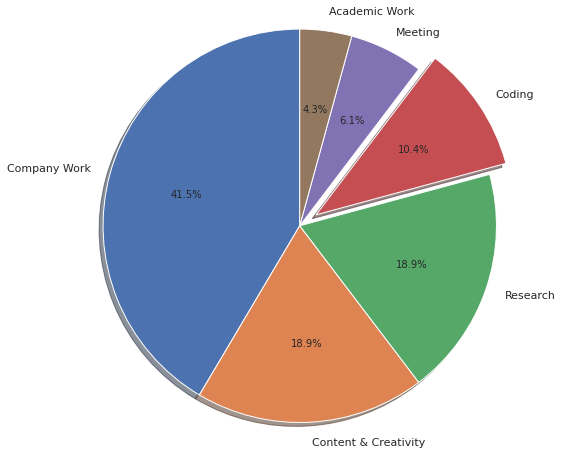

In [ ]:
e1 = df['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
e1 = e1.apply(splitting_columns)
e1[0] = e1[0].str.strip()
e1[1] = e1[1].str.strip()
e1[2] = e1[2].str.strip()
e2 = e1[0].append(e1[1], ignore_index=True)
e3 = e2.append(e1[2], ignore_index=True)
hub_activity = e3.value_counts(dropna=True).to_frame()
hub_activity.columns = ['Count']
hub_activity = hub_activity.reset_index() 
hub_activity = hub_activity.rename(columns={'index':'Activity'})
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = hub_activity['Activity']
sizes = hub_activity['Count']
explode = (0, 0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(9, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
hub_activity

,Activity,Count
0,Company Work,409
1,Content & Creativity,186
2,Research,186
3,Coding,103
4,Meeting,60
5,Academic Work,42


In [ ]:
hub_activity.to_latex()

'\\begin{tabular}{llr}\n\\toprule\n{} &              Activity &  Count \\\\\n\\midrule\n0 &          Company Work &    398 \\\\\n1 &  Content \\& Creativity &    181 \\\\\n2 &              Research &    179 \\\\\n3 &                Coding &     91 \\\\\n4 &               Meeting &     60 \\\\\n5 &         Academic Work &     41 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
df['First Name'] = df['First Name'].str.strip()
total_number_signees = (df['First Name'].unique()).size
df['First Name'].unique()

array(['Kwanele', 'José', 'Simanga', 'Sikhulile', 'Mzwandile',
       'Gcinimiyalo', 'Lungelo', 'Zack', 'Sabelo', 'Sibusiso', 'Mlungisi',
       'Percy', 'Mano', 'Bagcinele', 'Thobeka', 'Fanelesibonge',
       'Ncobile', 'Nosifiso', 'Lihle', 'Nomalungelo', 'Sebenzile',
       'Nombuso', 'Lwazi', 'Sibahle', 'Ayanda', 'Siphumelele', 'Muzi',
       'Alex', 'Thandwa', 'Bafana', 'Jonathan', 'Fezile', 'Tiyandza',
       'Lindinkosi', 'Maphila', 'Mnqobi', 'Zolile', 'Mhlengi',
       'Thelumusa', 'Sihle', 'Kangiso', 'Majaha', 'Gcina', 'Thokozani'],
      dtype=object)

Converting 'how many houre will you be putting in?' into float object

In [ ]:
df['How many hours will you be putting in?'] = pd.to_numeric(df['How many hours will you be putting in?'])

In [ ]:
#df['First Name'] = df['First Name'].replace('Sabelo S', 'Sabelo')
#df['First Name'] = df['First Name'].replace('Siphumelele Poestess', 'Siphumelele')
#df['First Name'] = df['First Name'].replace('Muzi Chaboy', 'Muzi')
#df['First Name'] = df['First Name'].replace('Snowsen Innovations', 'Bafana')
#df['First Name'] = df['First Name'].replace('Kwanele Prince', 'Kwanele')
#df['First Name'] = df['First Name'].replace('Tsabedze', 'Kwanele') 
e5 = df[['First Name', 'How many hours will you be putting in?']]
e5 = e5.groupby(['First Name'], as_index=False).sum()
e5 = e5.set_index(['First Name']).sort_values(['How many hours will you be putting in?'], ascending=False)
e5

,How many hours will you be putting in?
First Name,
José,1855.000000
Fanelesibonge,796.650000
Gcinimiyalo,484.433333
Lungelo,481.000000
Kwanele,347.300000
Simanga,245.766667
Thobeka,234.200000
Mlungisi,233.716667
Mzwandile,229.550000


In [ ]:
e5.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &  How many hours will you be putting in? \\\\\nFirst Name    &                                         \\\\\n\\midrule\nJosé          &                             1843.000000 \\\\\nFanelesibonge &                              743.650000 \\\\\nGcinimiyalo   &                              481.433333 \\\\\nLungelo       &                              478.000000 \\\\\nKwanele       &                              347.300000 \\\\\nSimanga       &                              240.766667 \\\\\nThobeka       &                              234.200000 \\\\\nMlungisi      &                              233.716667 \\\\\nMzwandile     &                              229.550000 \\\\\nSikhulile     &                              203.750000 \\\\\nZack          &                              198.566667 \\\\\nSibahle       &                              186.316667 \\\\\nBafana        &                              169.616667 \\\\\nNombuso       &                     

In [ ]:
d12000 = df['First Name']
#d12 = d12.replace('Kwanele Prince', 'Kwanele')
#d12 = d12.replace('Tsabedze', 'Kwanele')
d13000 = d12000.value_counts().to_frame()
d13000.columns = ['Number of hub visits']
hubbers_historically = d13000
hubbers_historically

,Number of hub visits
José,154
Gcinimiyalo,79
Fanelesibonge,68
Lungelo,58
Kwanele,58
Mlungisi,56
Mzwandile,44
Sibahle,35
Bafana,30
Zack,28


In [ ]:
ultimate_historically = hubbers_historically.merge(e5, right_index=True, left_index=True)
ultimate_historically

,Number of hub visits,How many hours will you be putting in?
José,154,1855.000000
Gcinimiyalo,79,484.433333
Fanelesibonge,68,796.650000
Lungelo,58,481.000000
Kwanele,58,347.300000
Mlungisi,56,233.716667
Mzwandile,44,229.550000
Sibahle,35,208.316667
Bafana,30,185.116667
Zack,28,198.566667


In [ ]:
ultimate_historically.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  Number of hub visits &  How many hours will you be putting in? \\\\\n\\midrule\nJosé          &                   154 &                             1855.000000 \\\\\nGcinimiyalo   &                    79 &                              484.433333 \\\\\nFanelesibonge &                    68 &                              796.650000 \\\\\nLungelo       &                    58 &                              481.000000 \\\\\nKwanele       &                    58 &                              347.300000 \\\\\nMlungisi      &                    56 &                              233.716667 \\\\\nMzwandile     &                    44 &                              229.550000 \\\\\nSibahle       &                    35 &                              208.316667 \\\\\nBafana        &                    30 &                              185.116667 \\\\\nZack          &                    28 &                              198.566667 \\\\\nSimanga       &    

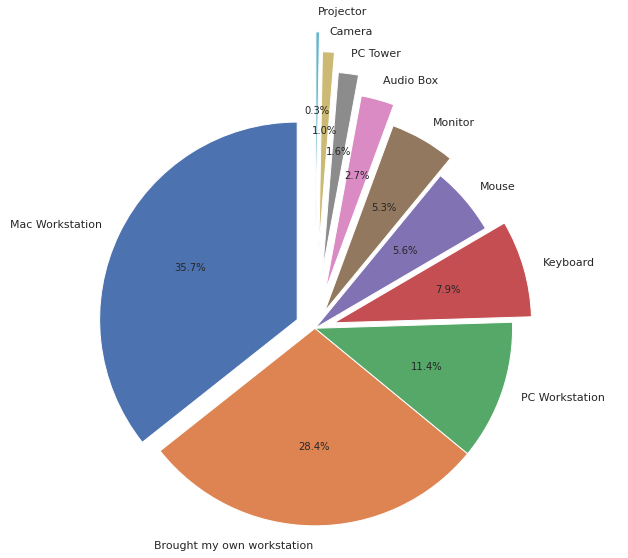

In [ ]:
e7 = df['What equipment will you use?']
e7 = e7.apply(splitting_columns)
e7[0] = e7[0].str.strip()
e7[1] = e7[1].str.strip()
e7[2] = e7[2].str.strip()
e7[3] = e7[3].str.strip()
e7[4] = e7[4].str.strip()
e7[5] = e7[5].str.strip()
e8 = e7[0].append(e7[1], ignore_index=True)
e9 = e8.append(e7[2], ignore_index=True)
e10 = e9.append(e7[3], ignore_index=True)
e11 = e10.append(e7[4], ignore_index=True)
e12 = e11.append(e7[5], ignore_index=True)
equipment_used_hist = e12.value_counts(dropna=True).to_frame()
equipment_used_hist.columns = ['Count']
equipment_used_hist = equipment_used_hist.reset_index() 
equipment_used_hist = equipment_used_hist.rename(columns={'index':'Equipment'})

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = equipment_used_hist['Equipment']
sizes = equipment_used_hist['Count']
explode = (0.1, 0, 0, 0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
equipment_used_hist['%'] = (equipment_used_hist['Count'] / equipment_used_hist['Count'].sum()).multiply(100)
equipment_used_hist

,Equipment,Count,%
0,Mac Workstation,368,35.658915
1,Brought my own workstation,293,28.391473
2,PC Workstation,118,11.434109
3,Keyboard,82,7.945736
4,Mouse,58,5.620155
5,Monitor,55,5.329457
6,Audio Box,28,2.713178
7,PC Tower,17,1.647287
8,Camera,10,0.968992
9,Projector,3,0.290698


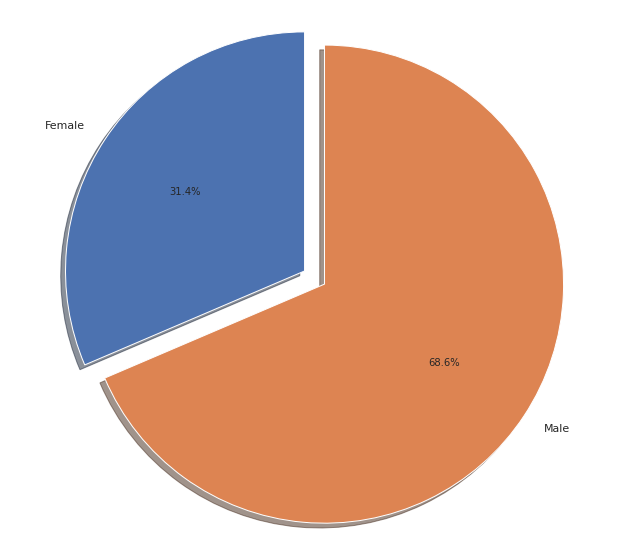

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [11, 24]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

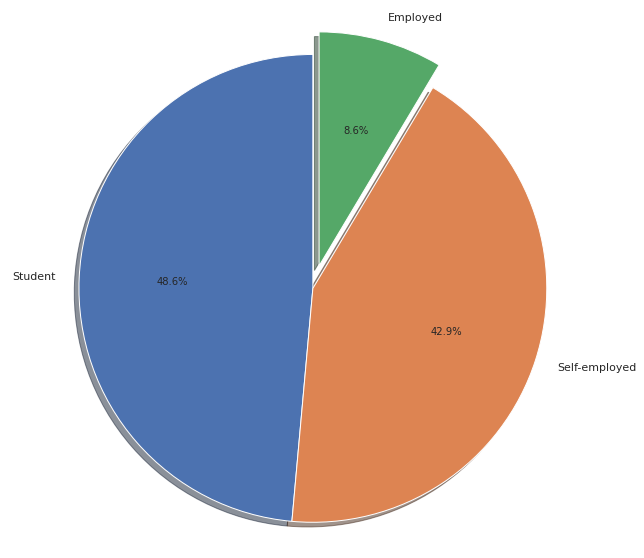

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Self-employed', 'Employed'
sizes = [17, 15, 3]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

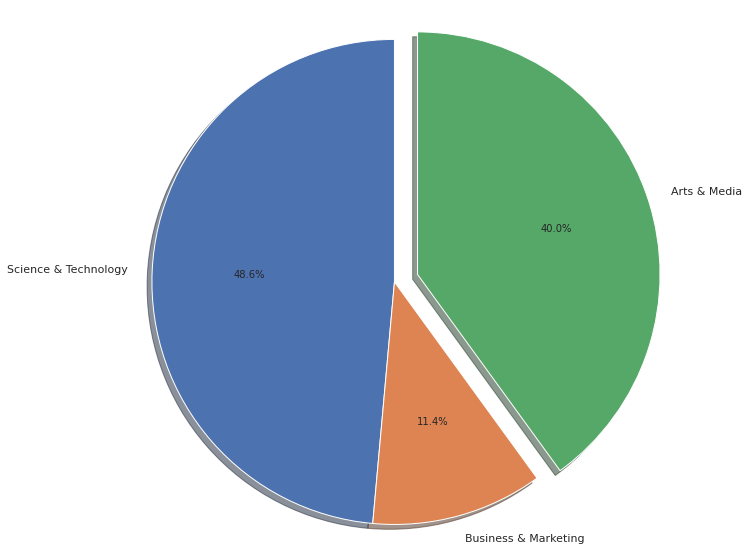

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Science & Technology' , 'Business & Marketing', 'Arts & Media'
sizes = [17, 4, 14]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

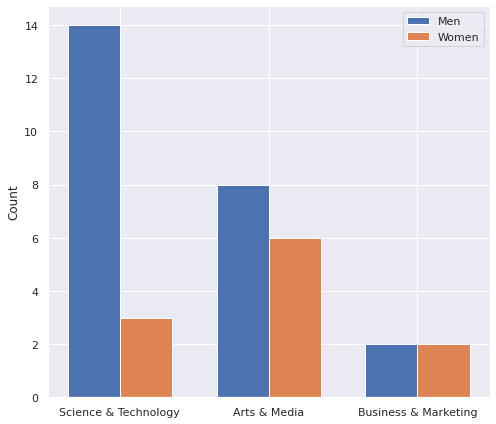

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Science & Technology', 'Arts & Media', 'Business & Marketing']
men_means = [14, 8, 2]
women_means = [3, 6, 2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Count by profession and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [ ]:
inputss = [['Female', 11], ['Male', 24]]
demographics = pd.DataFrame(inputss, columns=['Category', 'Count'])
demographics

,Category,Count
0,Female,11
1,Male,24


In [ ]:
inputss = [['Science & Technology', 14, 3], ['Arts & Media', 8, 6], ['Business & Marketing', 2, 2]]
demographics = pd.DataFrame(inputss, columns=['Category', 'Female', 'Male'])
demographics

,Category,Female,Male
0,Science & Technology,14,3
1,Arts & Media,8,6
2,Business & Marketing,2,2


In [ ]:
day_of_week_traf = df.index.to_series()
day_of_week_traf = day_of_week_traf.dt.dayofweek 
#headers = ['day of week']
#df9 = pd.DataFrame(df9, columns = headers)
day_of_the_week_traf = day_of_week_traf.value_counts().to_frame()
day_of_the_week_traf['Day of week'] = 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday', 'Sunday'
day_of_the_week_traf.rename(columns={'Timestamp':'Count'})


,Count,Day of week
2,154,Tuesday
1,145,Wednesday
4,138,Thursday
3,133,Friday
0,123,Monday
5,82,Saturday
6,52,Sunday


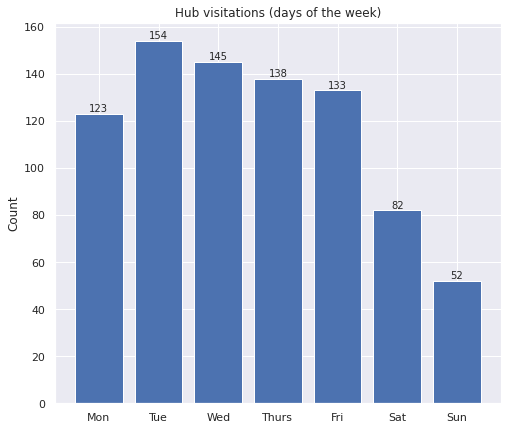

In [ ]:
%matplotlib inline
days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
s = [123, 154, 145, 138, 133, 82, 52]
width = 8
height = 7
plt.figure(figsize=(width, height))
plt.bar(days, s)
plt.ylabel("Count")
plt.title("Hub visitations (days of the week)");

for i in range(len(s)):
  plt.annotate(str(s[i]), xy=(days[i],s[i]), ha='center', va='bottom')

plt.show()

In [ ]:
missing_dates = pd.date_range(df.index.min(), df.index.max()).difference(df.index).size - 9
missing_dates

78

In [ ]:
attendance_dates = pd.date_range(df.index.min(), df.index.max())
avarage_daily_attendance = len(df['First Name']) / (attendance_dates.size - missing_dates)
daily_avarage_time_spent = (df['How many hours will you be putting in?'].sum() / attendance_dates.size) / avarage_daily_attendance
print('Maximum time that was spent at the hub by a hubber (hrs): {}' .format(df['How many hours will you be putting in?'].max()))
print('')
print('daily avarage time spent by hubbers at the hub (hrs): {}' .format(daily_avarage_time_spent))
print('')
print('Minimum time that was spent at the hub by a hubber (hrs): {}' .format(df['How many hours will you be putting in?'].min()))

Maximum time that was spent at the hub by a hubber (hrs): 72.0

daily avarage time spent by hubbers at the hub (hrs): 5.052535549244022

Minimum time that was spent at the hub by a hubber (hrs): 0.25


In [ ]:
date_date = [['Maximum time that was spent at the hub by a hubber at a go', df['How many hours will you be putting in?'].max()], ['daily avarage time spent by hubbers collectively at the hub', daily_avarage_time_spent], ['Minimum time that was spent at the hub by a hubber at a go', df['How many hours will you be putting in?'].min()]]
Date_Date = pd.DataFrame(date_date, columns=['Argument', 'Time(hrs)'])
Date_Date

,Argument,Time(hrs)
0,Maximum time that was spent at the hub by a hu...,72.000000
1,daily avarage time spent by hubbers collective...,5.052536
2,Minimum time that was spent at the hub by a hu...,0.250000
